In [1]:
#this cell is valid when you're working on google colab and you want to upload the data to colab environment to use in your notebook
#uploading the data file from your Desktop
#from google.colab import files
#files.upload()

## Loading all the relevant libraries

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_columns',40)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objs as go
import plotly.figure_factory as ff


In [3]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

## Data Overview

In [4]:
#Loading the dataset in Pandas dataframe
df_cancer = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df_cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [5]:
print(df_cancer.columns)
print()
print("Cancer dataset dimensions : {}".format(df_cancer.shape))
print()
print("Rows:",df_cancer.shape[0])
print()
print("Columns:",df_cancer.shape[1])

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Cancer dataset dimensions : (569, 33)

Rows: 569

Columns: 33


There is one column in the end which is random so we will drop this column

In [6]:
df_cancer = df_cancer.drop('Unnamed: 32',axis=1)

In [7]:
print(df_cancer.columns)
df_cancer.head()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

It is always a good practice to see some **stats(mean,median,percentiles)** of all the variables involve, and pandas has a describe() functions especially for this purpose.
We are doing Transpose of the describe() output since we have almost 30 columns to see.
This can also be used to see outliers without using any plot.

In [8]:
df_cancer.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

### checking for any missing value in data, if there are any missing value we will be doing missing value imputation

In [9]:
print(df_cancer.isnull().any().any())

False


And there are no missing records in the given data.
Well done.
Let's move ahead.

## Exploratory Data Analysis(EDA)

Let's see what we have in our dependent variable(**diagnosis**). Here we are using graph objects of plotly library.

In [10]:
configure_plotly_browser_state()
trace = go.Pie(labels = ['benign','malignant'], values = df_cancer['diagnosis'].value_counts(), 
               textfont=dict(size=10), opacity = 0.7,
               marker=dict(colors=['green', 'red'], 
               line=dict(color='#000000', width=1.0)))
           

layout= go.Layout(
        title={
        'text': "Distribution of dependent(diagnosis) variable",
        'y':0.8,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig = go.Figure(data = [trace], layout=layout)
fig.show()

number of benign classes are much more than malignant

Mapping the categories of dependent variable to 1 and 0. We will be predicting whether the record is malignant cancer or not so it makes sense to tag malignant as 1

In [11]:
df_cancer['diagnosis']= df_cancer['diagnosis'].map({'M':1,'B':0})
df_cancer.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [12]:
df_cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [13]:
mal = df_cancer[(df_cancer['diagnosis'] != 0)]
print(mal.shape)
ben = df_cancer[(df_cancer['diagnosis'] == 0)]
print(ben.shape)
def show_plots(column, bin_size) :  
    t1 = mal[column]
    t2 = ben[column]
    
    hist_data = [t1, t2]
    
    group_labels = ['Malignant', 'Benign']
    colors = ['red', 'green']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = bin_size, curve_type='kde')
    
    fig['layout'].update(title = column)
    fig.show()

(212, 32)
(357, 32)


In [14]:
configure_plotly_browser_state()
show_plots('radius_mean', .3)
show_plots('texture_mean', .3)
show_plots('perimeter_mean',3)
show_plots('area_mean',20)


In [15]:
configure_plotly_browser_state()
show_plots('radius_se', 0.1)
show_plots('texture_se', .1)
show_plots('perimeter_se', .5)
show_plots('area_se', 5)


In [16]:
configure_plotly_browser_state()
show_plots('radius_worst', .5)
show_plots('texture_worst', .5)
show_plots('perimeter_worst', 5)
show_plots('area_worst', 15)


heatmap is a good visualtization plot to see the corrleation among vaiables and there is not point of feeding highly correlated variables into any ML model because we are not providing any extra information through that variables and we are adding a complexity to any ML model by adding 1 variable. We want out model to as generic and simpleas possible.

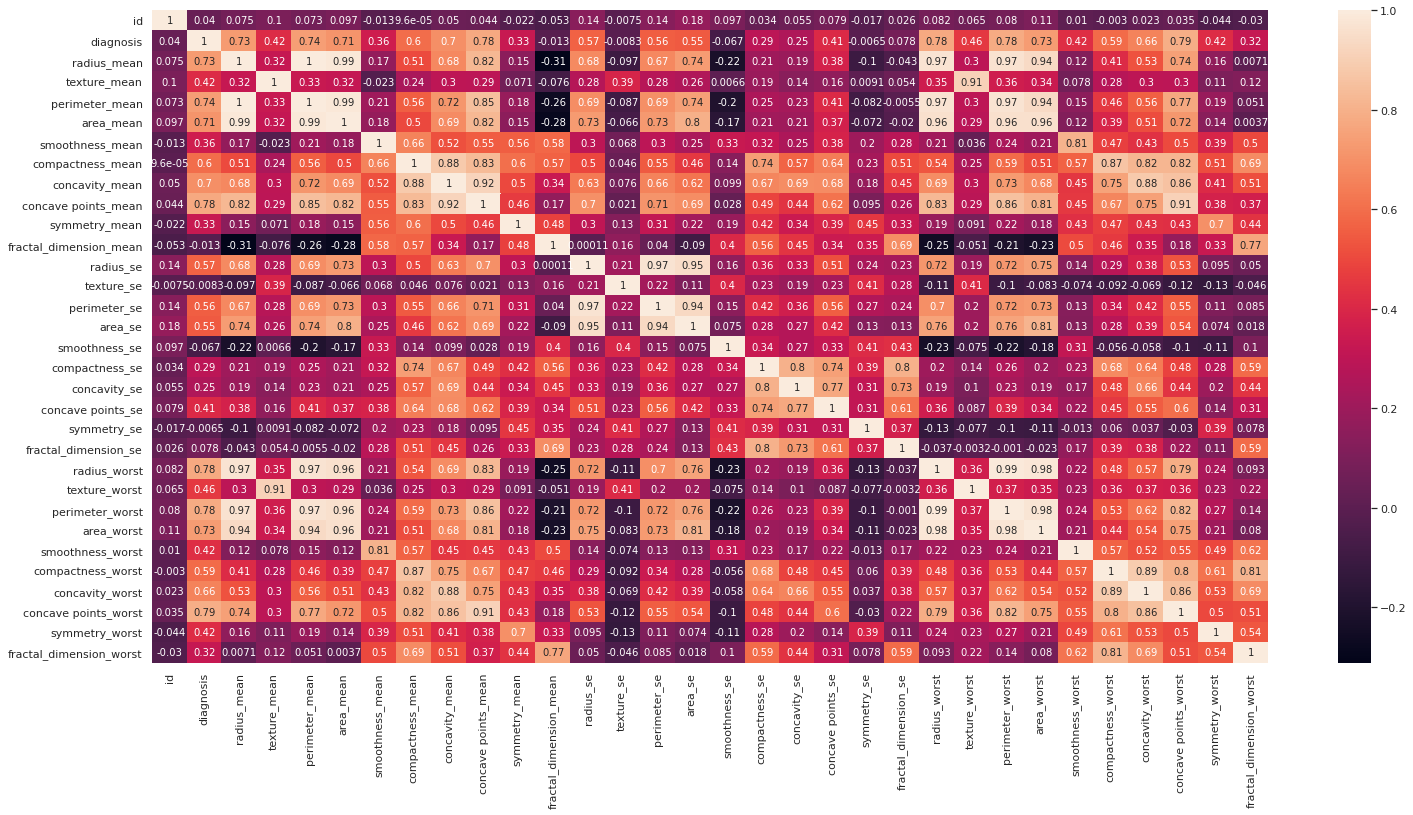

In [17]:
plt.figure(figsize=(25,12))
sns.heatmap(df_cancer.corr(),annot=True)

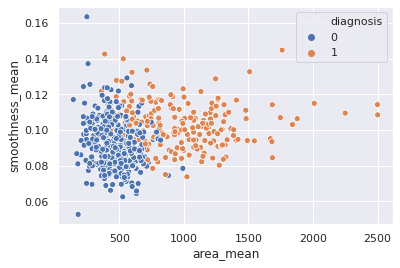

In [18]:
sns.scatterplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data=df_cancer)

## Model Building

### Model1. Baseline Model
We will build a model by using all the variables present in our model using random forest classifier. This will be our baseline model which we will try to beat by using feature selection and also by changing the classifier to xgboost.

In [19]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
len(features)

30

#### Splitting the data into train and val to build the model on train and validate it on val data.

In [20]:
X =df_cancer[features].values
y =df_cancer['diagnosis']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [21]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=22,stratify=y)
print("Shape of train dataset:")
print(X_train.shape)
print(y_train.shape)
print("\n")
print("Shape of val dataset:")
print(X_val.shape)
print(y_val.shape)
print("\n")

Shape of train dataset:
(398, 30)
(398,)


Shape of val dataset:
(171, 30)
(171,)




#### Model Building

In [22]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(max_depth=1, random_state=0, verbose=0,n_estimators=50)
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=1, n_estimators=50, random_state=0)

In [23]:
y_pred1 = model1.predict(X_val)

#### Model Evaluation

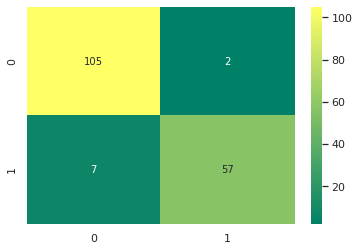

In [24]:
cnf1 = confusion_matrix(y_val,y_pred1)
sns.heatmap(cnf1,annot=True,cmap='summer',fmt='g')

In [25]:
acc1 = accuracy_score(y_val,y_pred1)
print("Accuracy: for baseline model is: %0.3f"%acc1)

print("RF train accuracy: %0.3f" % model1.score(X_train, y_train))
print("RF test accuracy: %0.3f" % model1.score(X_val, y_val))

Accuracy: for baseline model is: 0.947
RF train accuracy: 0.925
RF test accuracy: 0.947


In [26]:
print(classification_report(y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       107
           1       0.97      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



(30,)
30


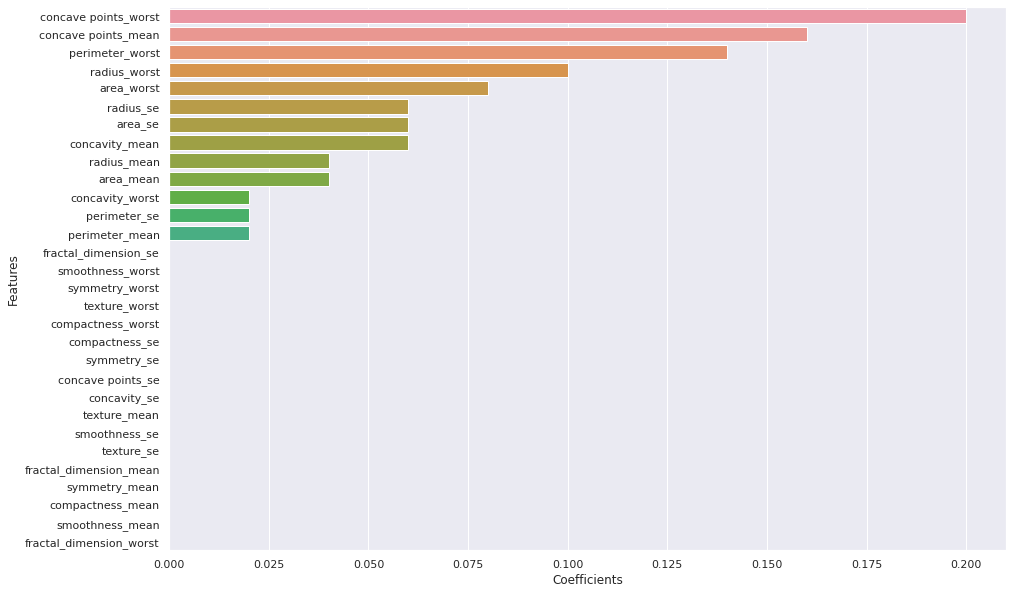

In [27]:
coef1= model1.feature_importances_
print(coef1.shape)
print(len(features))
coefs1 = pd.DataFrame({"Features":features,"Coefficients":coef1})
feature_imp1 = coefs1.sort_values(by='Coefficients',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y='Features',x='Coefficients',data=feature_imp1)

### Model2. Random Forest using Parameter Tuning
We will use grid search to tune the parametrs of Random Forest

In [28]:
param_grid={'n_estimators':[50,100,150,200,250],
            'max_depth':[1,2,3,4],
            'min_samples_split':[2,3,5],
            'max_features':['auto','sqrt','log2']}

In [29]:
model2= GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=0,n_jobs=-1)
model2.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [30]:
print(model2.best_params_)
y_pred2 = model2.predict(X_val)

{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


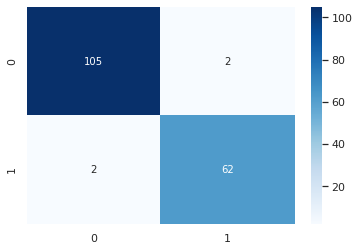

In [31]:
cnf2 = confusion_matrix(y_val,y_pred2)
sns.heatmap(cnf2,annot=True,fmt='g',cmap='Blues')

In [32]:
acc2 = accuracy_score(y_val,y_pred2)
print("Accuracy with GridSearch: %0.3f"%acc2)

print("RF train accuracy: %0.3f" % model2.score(X_train, y_train))
print("RF test accuracy: %0.3f" % model2.score(X_val, y_val))

Accuracy with GridSearch: 0.977
RF train accuracy: 0.975
RF test accuracy: 0.977


In [33]:
print(classification_report(y_val,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.97      0.97      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



(30,)
30


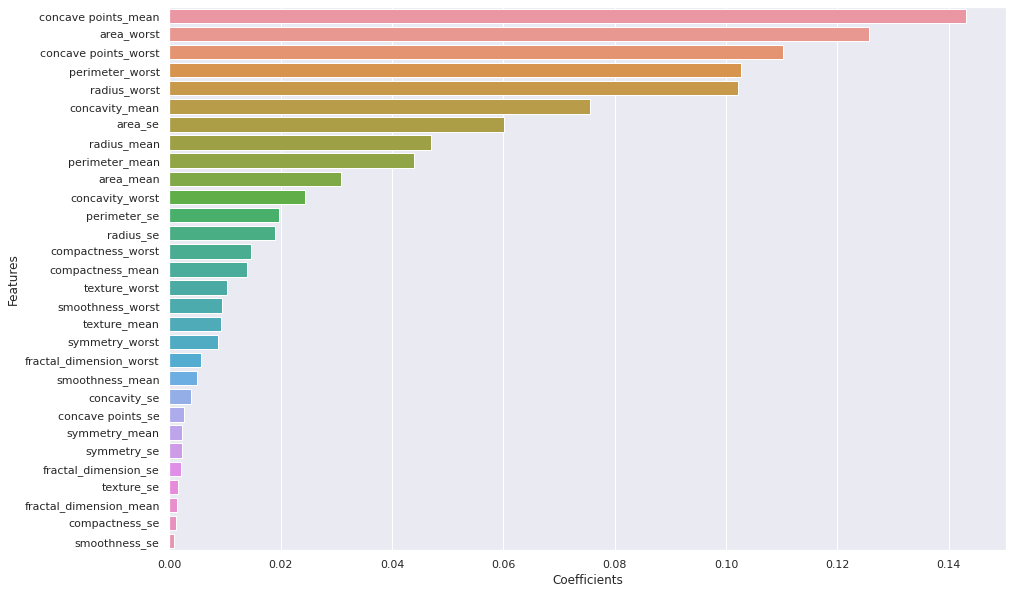

In [34]:
coef2= model2.best_estimator_.feature_importances_
print(coef2.shape)
print(len(features))
coefs2 = pd.DataFrame({"Features":features,"Coefficients":coef2})
feature_imp2 = coefs2.sort_values(by='Coefficients',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y='Features',x='Coefficients',data=feature_imp2)

***`We were able to increase our performance of 94% on val data to 98.8% on val data just by introducing paramter tuning using Grid Search CV.`***

### Model3.  Using Feature Selection
Adding the feature selection before feeding all the variables to any model.

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
model3 = Pipeline([
  ('feature_selection', SelectFromModel(ExtraTreesClassifier(n_estimators=50))),
  ('classification', RandomForestClassifier())
])
model3.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=ExtraTreesClassifier(n_estimators=50))),
                ('classification', RandomForestClassifier())])

Accuracy on Model3 is: 0.982
RF train accuracy: 1.000
RF test accuracy: 0.982


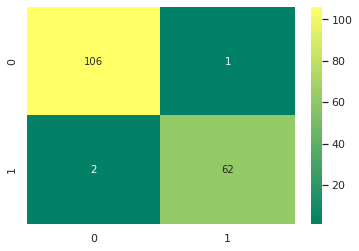

In [36]:
y_pred3 = model3.predict(X_val)
cnf3 = confusion_matrix(y_val,y_pred3)
sns.heatmap(cnf3,annot=True,cmap='summer',fmt='g')
acc3 = accuracy_score(y_val,y_pred3)
print("Accuracy on Model3 is: %0.3f"%acc3)
print("RF train accuracy: %0.3f" % model3.score(X_train, y_train))
print("RF test accuracy: %0.3f" % model3.score(X_val, y_val))

In [37]:
print(classification_report(y_val,y_pred3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concave points_worst']
(10,)
10


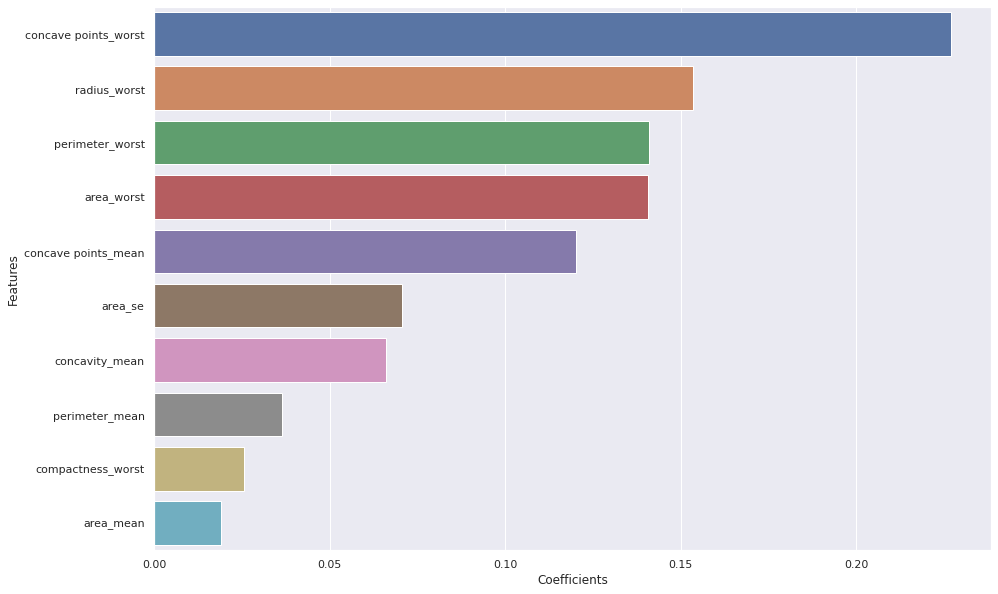

In [38]:
#Feature Importance
f1 = model3.steps[0][1].get_support()
new_f = [features[i] for i,val in enumerate(f1) if val==True]
print(new_f)
coef3 = model3.steps[1][1].feature_importances_
print(coef3.shape)
print(len(new_f))
coefs3 = pd.DataFrame({"Features":new_f,"Coefficients":coef3})
feature_imp3 = coefs3.sort_values(by='Coefficients',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y='Features',x='Coefficients',data=feature_imp3)

***`We were able to increase our performance of 94% on val data to 98.2% on val data just by using Feature Selection of Extratree classifier. Here we are using 11 features to train our model that too without any paramter tuning and we are able to match the Model2 performance where we used 31 variables and parameter tuning.`***

### Model4. Xgboost

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model4 = XGBClassifier()
model4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy on Model3 is: 0.988
RF train accuracy: 1.000
RF test accuracy: 0.988


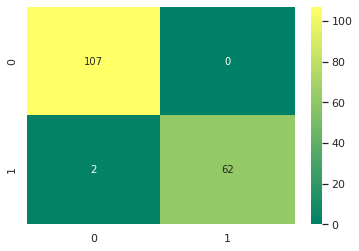

In [40]:
y_pred4 = model4.predict(X_val)
cnf4 = confusion_matrix(y_val,y_pred4)
sns.heatmap(cnf4,annot=True,cmap='summer',fmt='g')
acc4 = accuracy_score(y_val,y_pred4)
print("Accuracy on Model3 is: %0.3f"%acc4)
print("RF train accuracy: %0.3f" % model4.score(X_train, y_train))
print("RF test accuracy: %0.3f" % model4.score(X_val, y_val))

In [41]:
print(classification_report(y_val,y_pred4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



(30,)
30


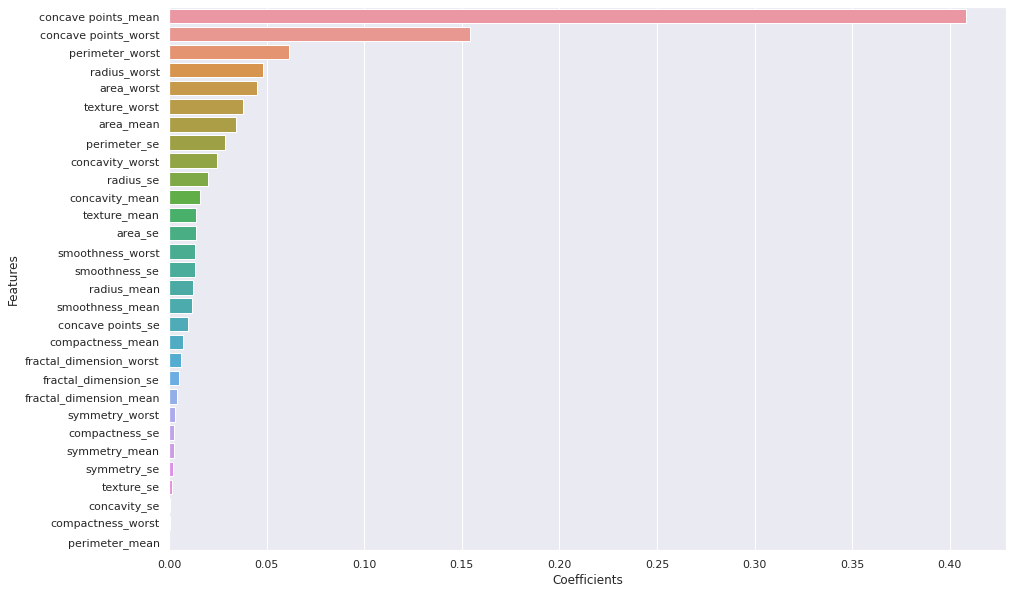

In [42]:
coef4= model4.feature_importances_
print(coef4.shape)
print(len(features))
coefs4 = pd.DataFrame({"Features":features,"Coefficients":coef4})
feature_imp4 = coefs4.sort_values(by='Coefficients',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y='Features',x='Coefficients',data=feature_imp4)

***`We were able to increase our performance of 94% on val data(baseline model) to 98.8% on val data just by using Xgboost without any paramter tuning and we are able to match the Model2 performance where we used 31 variables and parameter tuning.
With only around 10 lines of code you can achieve the 98.8% accuracy on val data using Xgboost`***

### Model5. Light GBM

In [43]:
from lightgbm import LGBMClassifier
model5 = LGBMClassifier()
model5.fit(X_train, y_train)

LGBMClassifier()

Accuracy on Model5 is: 0.988
Ligtgbm train accuracy: 1.000
LightGBM test accuracy: 0.988


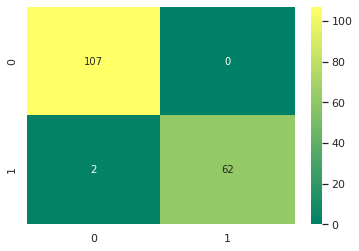

In [44]:
y_pred5 = model5.predict(X_val)
cnf5 = confusion_matrix(y_val,y_pred5)
sns.heatmap(cnf5,annot=True,cmap='summer',fmt='g')
acc5 = accuracy_score(y_val,y_pred5)
print("Accuracy on Model5 is: %0.3f"%acc5)
print("Ligtgbm train accuracy: %0.3f" % model5.score(X_train, y_train))
print("LightGBM test accuracy: %0.3f" % model5.score(X_val, y_val))

In [45]:
print(classification_report(y_val,y_pred5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



(30,)
30


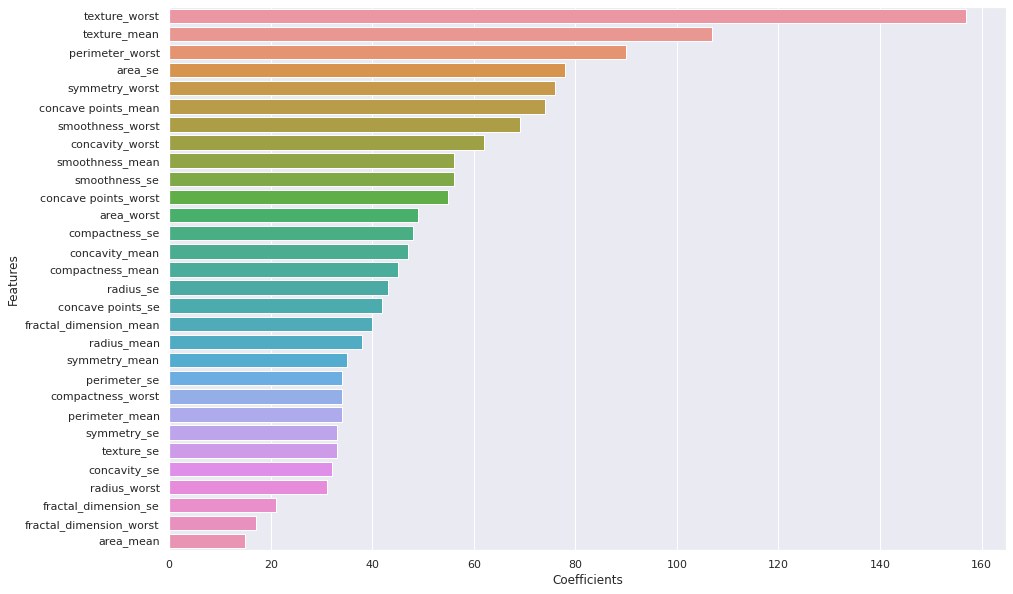

In [46]:
coef5= model5.feature_importances_
print(coef5.shape)
print(len(features))
coefs5 = pd.DataFrame({"Features":features,"Coefficients":coef5})
feature_imp5 = coefs5.sort_values(by='Coefficients',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(y='Features',x='Coefficients',data=feature_imp5)

***`We were able to increase our performance of 94% on val data(baseline model) to 98.8% on val data just by using LightGBM without any paramter tuning and we are able to match the Model2 performance where we used 31 variables and parameter tuning.
With only around 10 lines of code you can achieve the 98.8% accuracy on val data using LightGBM
Model Performance of XGboost and LightGBM are similar.`***